## Hosford, W.F. and Caddell, R.M. (2007), Metal Forming. Mechanics and Metallurgy (3rd ed), Prentice Hall.
### Exercise 2.2.

Consider a 6-cm diameter tube with 1-mm thick wall with closed ends made
from a metal with a tensile yield strength of 25 MPa. Apply a compressive
load of 2000 N to the ends. What internal pressure is required to cause yielding
according to (a) the Tresca criterion and (b) the von Mises criterion?

### Solutions

Data: $D=60$ mm, $t=1$ mm, $Y=25$ MPa, $F=-2000$ N.

Let assume $\sigma_r = 0$ through the wall thickness. Equilibrium balances in circumferential and longitudinal directions:

$$
2 \sigma_\theta t L = p D L
\quad\rightarrow\quad
\sigma_\theta = p \frac{D}{2t} 
$$

$$
\sigma_z \pi D t = p \frac{\pi D^2}{4} + F
\quad\rightarrow\quad
\sigma_z = p \frac{D}{4t} + \frac{F}{\pi D t}
$$

#### Tresca

There are two cases depending on the internal pressure $p$:

- Case I:
$$
0 < p < p_{cr} = \frac{-F}{\pi D^2 /4}
\quad\rightarrow\quad
\sigma_r = 0
\, , \,
\sigma_\theta > 0
\, , \,
\sigma_z < 0
\quad\rightarrow\quad
\sigma_\max - \sigma_\min = \sigma_\theta - \sigma_z
$$

- Case II:
$$
p > p_{cr} = \frac{-F}{\pi D^2 /4}
\quad\rightarrow\quad
\sigma_r = 0
\, , \,
\sigma_\theta > \sigma_z > 0
\quad\rightarrow\quad
\sigma_\max - \sigma_\min = \sigma_\theta - \sigma_r
$$

Let us suppose case I. The Tresca criterion yields:
$$
\sigma_\theta(p) - \sigma_z(p) = Y
\quad\rightarrow\quad
p \frac{D}{4t} - \frac{F}{\pi D t} = Y
\quad\rightarrow\quad
p = \frac{4t}{D}\left( Y + \frac{F}{\pi D t} \right)
$$

Run the cell below to validate the assumption:

In [1]:
import math

D = 60
t = 1
Y = 25
F = -2000

sr = 0
def st(p):
    return p*D/(2*t)
def sz(p):
    return p*D/(4*t) + F/(math.pi*D*t)

p_cr = -F/(math.pi*D**2/4)
print('p_cr = %.2f MPa' % p_cr)

p1 = 4*t/D*(Y+F/(math.pi*D*t))
print('p    = %.2f MPa' % p1)
if p1 < p_cr:
    p = p1
    print('The assumption p < p_cr was correct.')
else:
    print('The assumption p < p_cr was wrong!')

p_cr = 0.71 MPa
p    = 0.96 MPa
The assumption p < p_cr was wrong!


If the above assumption was wrong, let us suppose case II. The Tresca criterion yields:
$$
\sigma_\theta(p) - \sigma_r = Y
\quad\rightarrow\quad
p \frac{D}{2t} = Y 
\quad\rightarrow\quad
p = \frac{2t}{D} Y 
$$

Run the cell below to validate the assumption:

In [2]:
p2 = 2*t/D*Y
print('p_cr = %.2f MPa' % p_cr)
print('p    = %.2f MPa' % p2)
if p2 > p_cr:
    p = p2
    print('The assumption p > p_cr was correct.')
else:
    print('The assumption p > p_cr was wrong!')
    
print("Thus, principal stresses can be found as:")
print("   sigma_r     = %s" % sr)
print("   sigma_theta = %.2f MPa" % st(p))
print("   sigma_z     = %.2f MPa" % sz(p))

p_cr = 0.71 MPa
p    = 0.83 MPa
The assumption p > p_cr was correct.
Thus, principal stresses can be found as:
   sigma_r     = 0
   sigma_theta = 25.00 MPa
   sigma_z     = 1.89 MPa


#### Mises

$$ (\sigma_r^2-\sigma_\theta^2) + (\sigma_r^2-\sigma_z^2) + (\sigma_z^2-\sigma_\theta^2) = 2 Y^2
$$

Since $\sigma_r=0$:

$$ \sigma_\theta^2 + \sigma_z^2 - \sigma_\theta \sigma_z = Y^2
$$

$$ \left( p \frac{D}{2t} \right)^2 + 
\left( p \frac{D}{4t} + \frac{F}{\pi D t} \right)^2 + 
\left( p \frac{D}{2t} \right) \left( p \frac{D}{4t} + \frac{F}{\pi D t} \right) = Y^2
$$

This is a quadratic equation $A p^2 + B p + C = 0$ that can be solved. Run the next cell to solve it:

In [3]:
from scipy.optimize import fsolve
func = lambda p: st(p)**2 + sz(p)**2 - st(p)*sz(p) - Y**2
p3, = fsolve(func, 1)

print('Solving the above equation --> p = %.2f MPa' % p3)

print("Principal stresses:")
print("   sigma_r     = %s" % sr)
print("   sigma_theta = %.2f MPa" % st(p3))
print("   sigma_z     = %.2f MPa" % sz(p3))

Solving the above equation --> p = 0.87 MPa
Principal stresses:
   sigma_r     = 0
   sigma_theta = 26.14 MPa
   sigma_z     = 2.46 MPa


Run the next cell to plot the Tresca and Mises yield surfaces and the stress path, where $\sigma_1=\sigma_\theta$ and $\sigma_2=\sigma_z$:

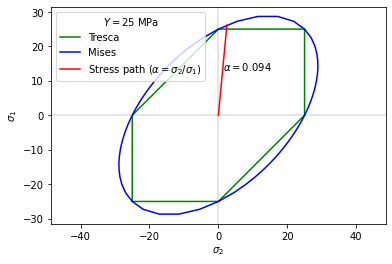

In [4]:
import functions
functions.plot_tresca_mises(Y, st(p3), sz(p3))